# Lecture 3 - Problem-oriented Lecture

## Lecture outcome
1. How to define a function (something similar to call function)
2. How to use linear space (linspace) function for discrete computation of a formula
3. How to find index of a list which has lowest value assigned
4. How to plot function(s) onto a graph in a using matplotlib library

Recording of this lecture session is based on Problem 3.3.2, discussing a simple model of interaction potential between two atoms as a function of their distances, r, is that of Leonard-Jones Potential

![image.png](pictures/p3.3.2.png)

### Problem 3.3.2.a
For this subsection, we will be computing for potential depth, epsilon, and location at the point which the potential of the system is minimum.

Plotting a graph requires an additional library called matplotlib.py 


In [27]:
# Import relevant packages for maths and plottings
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Dumping the constants for Argon atoms
A = 1.024e-23 #J nm^6
B = 1.582e-26 #J nm^12
k_b = 1.381e-23 # J K^-1

In [29]:
# Division of A and B to Boltzmann constant as per question recommendation
A /= k_b
B /= k_b 

## Function definition
We can use 'def arg()' to define a function. Look at the snippet below for implementation example

In [30]:
# We define the potential function U(r) and force function F(r) 

# New! Function definition
def U(r):
    return (B / r**12) - (A / r**6)

def F(r):
    return ((12*B) / r**13) - ((6*A) / r**7)

## Computing the points for the equations using linear space function

Python requires us to specify certain number of points for discretised computation. We shall use np.linspace() for this. 


The command is used in following way.

np.linspace(start_point, end_point, no_of_points_in_between)

In [31]:
# Initiate np.linspace() for discrete computation.
# Choose start and end points in a way that they enclose the equilibrium point, which supposedly falls 
# on 0.38164103. For this case, we can just choose 0.3 up to 0.7

# Begin by assigning r to with the np.linspace()
r = np.linspace(0.3, 0.7, 1000)

# Now, the calculation shall their inputs on the r. Defined functions are summoned as following
U_vals = U(r)
F_vals = F(r)

## Finding minimum value within certain an array of linear space using np.argmin(Argz)

Do take note that lists in array are just dynamic arrays.

We need to find the index for which the minimum value of potential energy of the system within computed range. And then, using the index for lowest potential point, we shall compute how deep is the potential well. 

Depth of the potential well at minimum point is to be designated to epsilon 

In [32]:
min_index = np.argmin(U_vals)
epsilon = U_vals[min_index]
r0 = r[min_index]

## Problem 3.3.2.b 
In this subsection, we will be computing for the harmonic approximation of the Leonard-Jones potential using the provided formula

In [33]:
# Calculation for k-term is expressed as follows
k = ((156*B) / (r0**14)) - ((42*A) / (r0**8))
V_val = ((1/2)*k*((r-r0)**2)) + epsilon  

#### Plotting the graph 
We now can begin plotting the graphs for problem a and b

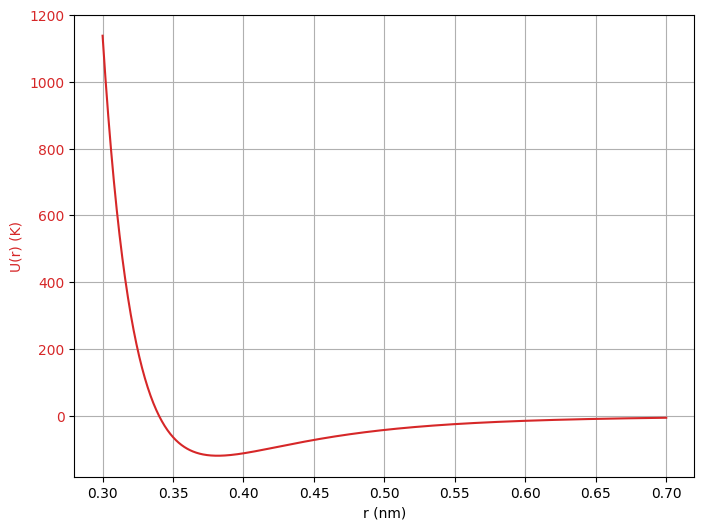

In [39]:
# Setting up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting U(r)
color = 'tab:red' # Designating the color scheme for this plot
ax1.set_xlabel('r (nm)') # Labelling the x-axis
ax1.set_ylabel('U(r) (K)', color = color) # Labelling the y-axis
ax1.plot(r, U_vals, color = color, label = 'U(r) - Leonard-Jones Potential') # Labelling the plot name
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.grid(True) # Enable grid appearance

In [40]:
# Overlaying the next graph, F(r), onto the same plot
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('F(r) (K/nm)', color = color2)
ax2.plot(r, F_vals, color = color2, label = 'F(r) - Force', linestyle = '--')
ax2.tick_params(axis = 'y', labelcolor = color2)

# Adjustment on y-axis for better visibility
ax1.set_ylim(epsilon * 1.5, max(U_vals) * 0.5)
ax2.set_ylim(min(F_vals) * 1.5, max(F_vals) * 0.5)

(-1268.5480172779567, 32939.61100428954)

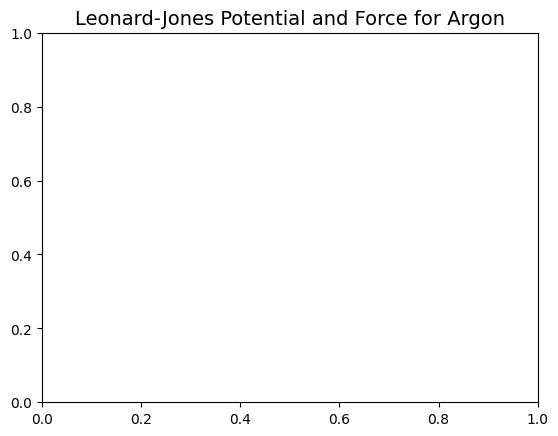

In [41]:
# Plotting for the harmonic approximation graph
color3 = 'tab:green'
ax1.plot(r, V_val, color = color3, linestyle = '-.', label = 'V(r) - Harmonic Approximation')

# Adding text to highlight epsilon and r0
ax1.text(r0, epsilon, f'ϵ = {epsilon:.3f} K\nr0 = {r0:.3f} nm',
        ha = 'right', va = 'bottom', fontsize = 10, color = 'black')

# Title and layout adjustments 
plt.title('Leonard-Jones Potential and Force for Argon', fontsize = 14)
fig.tight_layout()

# Add legends
ax1.legend(loc = 'upper left', fontsize = 10)
ax2.legend(loc = 'upper right', fontsize = 10)

# Show plot
plt.show()

### Combined code

This is the only way to make it work

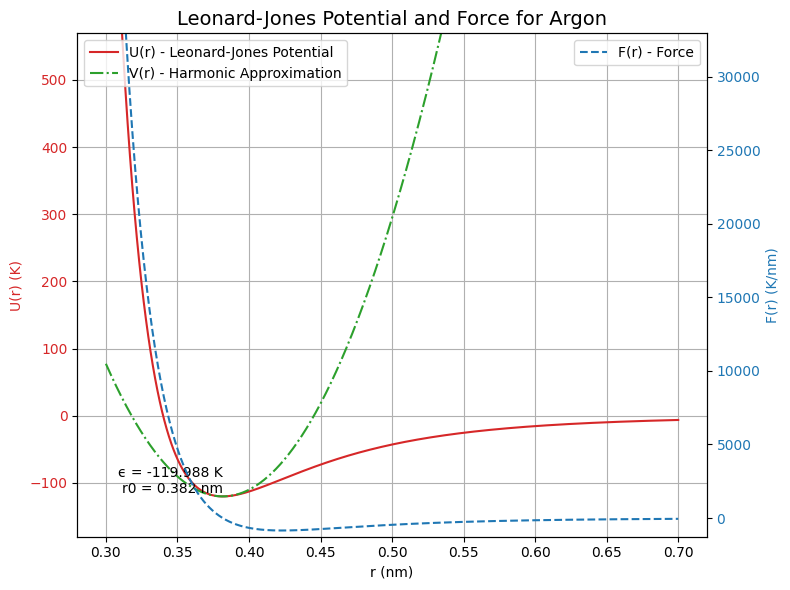

In [42]:
# Setting up plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting U(r)
color = 'tab:red' # Designating the color scheme for this plot
ax1.set_xlabel('r (nm)') # Labelling the x-axis
ax1.set_ylabel('U(r) (K)', color = color) # Labelling the y-axis
ax1.plot(r, U_vals, color = color, label = 'U(r) - Leonard-Jones Potential') # Labelling the plot name
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.grid(True) # Enable grid appearance

# Overlaying the next graph, F(r), onto the same plot
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('F(r) (K/nm)', color = color2)
ax2.plot(r, F_vals, color = color2, label = 'F(r) - Force', linestyle = '--')
ax2.tick_params(axis = 'y', labelcolor = color2)

# Adjustment on y-axis for better visibility
ax1.set_ylim(epsilon * 1.5, max(U_vals) * 0.5)
ax2.set_ylim(min(F_vals) * 1.5, max(F_vals) * 0.5)

# Plotting for the harmonic approximation graph
color3 = 'tab:green'
ax1.plot(r, V_val, color = color3, linestyle = '-.', label = 'V(r) - Harmonic Approximation')

# Adding text to highlight epsilon and r0
ax1.text(r0, epsilon, f'ϵ = {epsilon:.3f} K\nr0 = {r0:.3f} nm',
        ha = 'right', va = 'bottom', fontsize = 10, color = 'black')

# Title and layout adjustments 
plt.title('Leonard-Jones Potential and Force for Argon', fontsize = 14)
fig.tight_layout()

# Add legends
ax1.legend(loc = 'upper left', fontsize = 10)
ax2.legend(loc = 'upper right', fontsize = 10)

# Show plot
plt.show()